In [31]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

[dataset - Ad Click Prediction - Classification Problem](https://www.kaggle.com/code/sashankmvv/naive-bayes-classifier/data)

In [15]:
df = pd.read_csv('/Social_Network_Ads.csv')

In [16]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:
df.shape

(400, 5)

ID isn't necessary to this example

In [18]:
df.drop('User ID', axis = 1, inplace = True)

Transforming the gender column from string to numeric thtrough Label Encoding

In [19]:
label_gender = LabelEncoder()
df['Gender'] = label_gender.fit_transform(df['Gender'])

In [20]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


Simple data vizualization, the gender column is not good feature to our model, there's difference between men and women in the purchase behavior, so we'll drop this feature

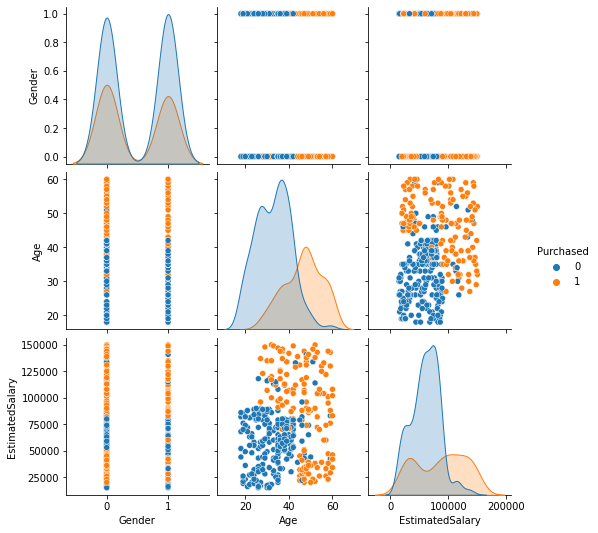

In [21]:
sns.pairplot(df, hue='Purchased', vars=df.columns.drop('Purchased'))

Spliting the data

In [117]:
x, y  = df.drop(columns = ['Purchased', 'Gender'], axis = 1).values, df['Purchased'].values

In [118]:
x_train, x_test, y_train, y_test = train_test_split(
  x,y, test_size = 0.20
)

In [107]:
from sklearn.linear_model import LogisticRegression

Training the model

In [119]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

Performance in the test:

In [129]:
predictions = model.predict(x_test)
accuracy_score(y_test, predictions)

0.8375

performance in the train:

In [134]:
predictions_train = model.predict(x_train)
accuracy_score(y_train, predictions_train)

0.853125

Vizualization the prediction in the data of test:

In [135]:
df_test = pd.DataFrame(x_test)
df_test['true'] = y_test
df_test['predicted'] = predictions

In [136]:
df_test.head()

,0,1,true,predicted
0,57,60000,1,1
1,37,144000,1,1
2,45,45000,1,0
3,23,28000,0,0
4,21,68000,0,0


The true data in the test:

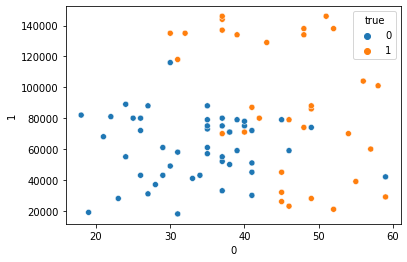

In [137]:
sns.scatterplot(data = df_test, x = 0, y = 1, hue = 'true')

The predictions in the test:

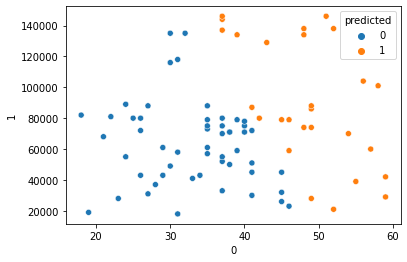

In [138]:
sns.scatterplot(data = df_test, x = 0, y = 1, hue = 'predicted')